In [1]:
import json

In [2]:
import destijl.style as ds
import pandas as pd
pd.set_option('display.max_rows', None)

In [3]:
%pylab inline
ds.use_style()

Populating the interactive namespace from numpy and matplotlib


# Assemble Dataset

In [4]:
master = pd.read_csv('Pokemon Database.csv', encoding='latin-1')
galar = pd.read_csv('pokemon-swordshield.csv')
ioa = pd.read_csv('ioa.csv')
with open('smogon.json') as f:
    smogon = json.load(f)

In [85]:
smogondf = pd.DataFrame(smogon['pokemon'])[['name', 'formats', 'oob']]

In [6]:
galar_names = galar['name01']

In [105]:
smogondf['nname'] = [d.split('-')[0] if len(d.split('-')) != 1 else d for d in smogondf['name']]
smogondf = smogondf.groupby('nname').agg({'formats': 'sum'})

In [21]:
ioa_names = ioa['pok']

In [30]:
swsh_names = set(galar_names.append(ioa_names))

In [106]:
swsh = master[master['Pokemon Name'].isin(swsh_names)]

In [107]:
swsh = swsh[~swsh['Alternate Form Name'].isin(['Mega', 'Mega X', 'Mega Y'])]
swsh = swsh.merge(smogondf, how='left', left_on='Pokemon Name', right_on='nname')

In [108]:
swsh.to_csv('pokemon_swsh_ioa.csv', index=False)

## IOA specific

In [64]:
ioa_unique = ioa[~ioa['pok'].isin(galar_names)]
ioa_unique = master.merge(ioa_unique, how='inner', left_on='Pokemon Name', right_on='pok')
ioa_unique = ioa_unique.drop_duplicates(subset=['Pokemon Name']).sort_values('ioa_number').reset_index()
# Account for evolutions
ioa_unique['IOA Pokedex Number'] = ioa_unique.index + 1
ioa_unique.set_index('IOA Pokedex Number').to_csv('ioa_unique.csv')

In [ ]:
evo_pairs = [
    ['Porygon', 'Porygon2'],
    ['Porygon2', 'Porygon-Z'],
    ['Magneton', 'Magnezone'],
]
for a, b in evo_pairs:
    ioa_unique = reorder(ioa_unique, a, b)
ioa_unique.reset_index(inplace=True)

In [58]:
def reorder(df, firstname, secondname):
    firstloc = df.index[df['Pokemon Name'] == firstname][0]
    secondloc = df.index[df['Pokemon Name'] == secondname][0]
    return pd.concat([df.iloc[:firstloc+1], df.iloc[secondloc], df.iloc[firstloc:secondloc], df.iloc[secondloc+1:]], axis=1)

# Parse Types

In [6]:
swsh = pd.read_csv('pokemon_swsh_ioa.csv')[['Pokedex Number', 'Pokemon Name', 'Primary Type', 'Secondary Type', 'formats']]

In [7]:
types = ['Normal','Fire','Fighting','Water','Flying','Grass','Poison','Electric','Ground','Psychic','Rock','Ice','Bug','Dragon','Ghost','Dark','Steel','Fairy']

In [8]:
counts, pokemon = {}, {}
for t in types:
    sub = swsh[(swsh['Primary Type'] == t) | (swsh['Secondary Type'] == t)].drop_duplicates(subset=['Pokemon Name'])
    pokemon[t] = sub
    counts[t] = len(sub)
counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}

In [12]:
pokemon['Rock']

,Pokedex Number,Pokemon Name,Primary Type,Secondary Type,formats
66,111,Rhyhorn,Ground,Rock,['LC']
67,112,Rhydon,Ground,Rock,['NU']
100,185,Sudowoodo,Rock,NaN,['Untiered']
112,213,Shuckle,Bug,Rock,['PU']
128,246,Larvitar,Rock,Ground,['LC']
129,247,Pupitar,Rock,Ground,['NFE']
130,248,Tyranitar,Rock,Dark,"['OU', 'National Dex']"
162,337,Lunatone,Rock,Psychic,['Untiered']
163,338,Solrock,Rock,Psychic,['Untiered']
193,438,Bonsly,Rock,NaN,['LC']


<BarContainer object of 18 artists>

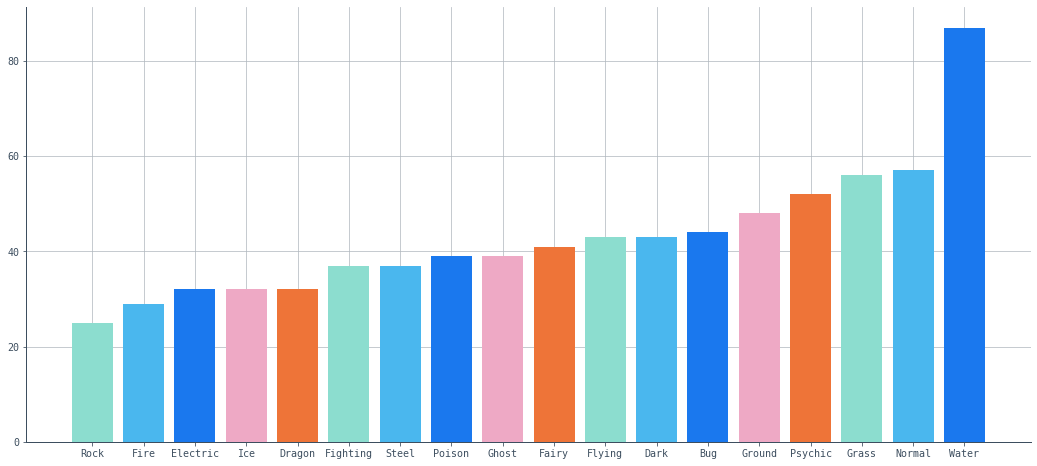

In [16]:
plt.figure(figsize=(18, 8))
plt.bar([k for k, v in counts.items()], [v for k, v in counts.items()], color=ds.SCORES);

In [24]:
mcounts, mpokemon = {}, {}
for t in types:
    sub = master[(master['Primary Type'] == t) | (master['Secondary Type'] == t)].drop_duplicates(subset=['Pokemon Name'])
    mpokemon[t] = sub
    mcounts[t] = len(sub)
mcounts = {k: v for k, v in sorted(mcounts.items(), key=lambda item: item[1])}

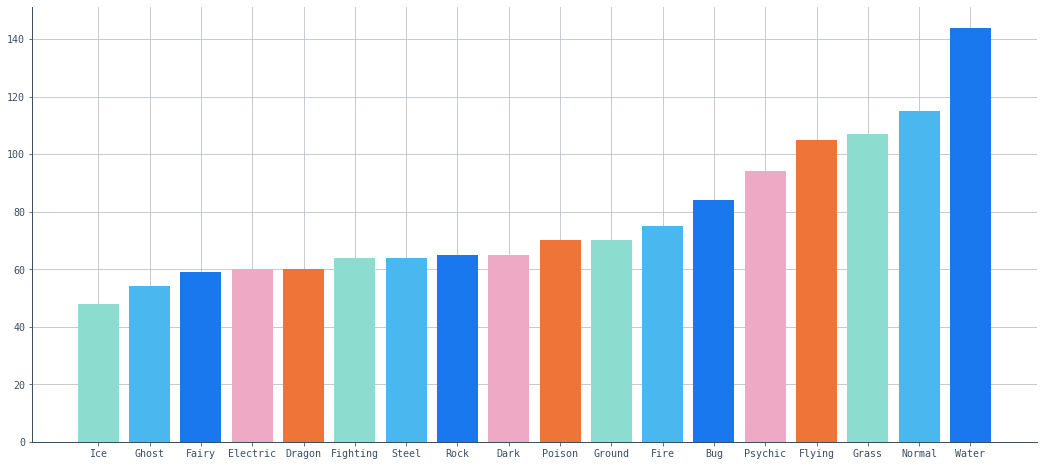

In [25]:
plt.figure(figsize=(18, 8))
plt.bar([k for k, v in mcounts.items()], [v for k, v in mcounts.items()], color=ds.SCORES);